In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

ushuaia ar
lata sb
rikitea pf
upernavik gl
jamestown sh
thompson ca
oktyabrskiy ru
bluff nz
lolua tv
alice springs au
norman wells ca
shenzhen cn
majene id
busselton au
bluff nz
vestmanna fo
vaini to
baiut ro
codrington ag
castro cl
hamilton bm
jiangyou cn
tasiilaq gl
ushuaia ar
new norfolk au
yuncheng cn
chuy uy
yellowknife ca
krasnoyarskiy ru
albany au
rikitea pf
halalo wf
cockburn town bs
barentsburg sj
hobart au
bengkulu id
broome au
albany au
rikitea pf
chicama pe
rikitea pf
svetlaya ru
hualmay pe
honiara sb
novyy urengoy ru
lagoa pt
hobart au
san juan de uraba co
roald no
barentsburg sj
bluff nz
menongue ao
east london za
port elizabeth za
hobart au
mataura pf
ushuaia ar
seoni malwa in
qaanaaq gl
mar del plata ar
codrington ag
basco ph
albany au
melfi td
hobart au
cidreira br
dikson ru
busselton au
mataura pf
eydhafushi mv
saint-philippe re
east london za
cherskiy ru
kralendijk an
toyooka jp
busselton au
castro cl
punta arenas cl
saldanha za
yarkovo ru
tasiilaq gl
castro cl
grand

saleaula ws
rikitea pf
massaguet td
port alfred za
atuona pf
shingu jp
new norfolk au
springbok za
illoqqortoormiut gl
port elizabeth za
saint-philippe re
vaini to
myaundzha ru
puerto ayora ec
sao joao da barra br
provideniya ru
inhambane mz
hambantota lk
umm lajj sa
carnarvon au
atuona pf
chalus ir
rikitea pf
port lincoln au
englewood us
margate za
georgetown sh
barrow us
norman wells ca
bredasdorp za
kismayo so
portland au
bengkulu id
butaritari ki
chuy uy
clyde river ca
albany au
henties bay na
cabra ph
longyearbyen sj
upernavik gl
kruisfontein za
chokurdakh ru
keti bandar pk
kodiak us
bahia de caraquez ec
bengkulu id
dosso ne
udachnyy ru
rikitea pf
geraldton au
wulanhaote cn
cidreira br
sentyabrskiy ru
rikitea pf
sangar ru
alofi nu
hermanus za
rikitea pf
neyshabur ir
pemangkat id
saint-philippe re
nanortalik gl
merauke id
rikitea pf
nikolskoye ru
sao filipe cv
ahipara nz
maiduguri ng
upernavik gl
new norfolk au
luderitz na
klaksvik fo
georgetown sh
padang id
gamba ga
rikitea pf
vai

kodiak us
constitucion mx
ostrovnoy ru
katsiveli ua
san luis ar
polunochnoye ru
marcona pe
bluff nz
saint george bm
albany au
bethel us
kushmurun kz
umzimvubu za
illoqqortoormiut gl
tsihombe mg
belushya guba ru
tiksi ru
ostrovnoy ru
tasiilaq gl
hirara jp
albany au
busselton au
tigil ru
namibe ao
mataura pf
severo-kurilsk ru


In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

604

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
url = "http://api.openweathermap.org/data/2.5/weather?" + "appid=" + weather_api_key 

In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | lata
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | upernavik
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | thompson
Processing Record 7 of Set 1 | oktyabrskiy
Processing Record 8 of Set 1 | bluff
Processing Record 9 of Set 1 | lolua
City not found. Skipping...
Processing Record 10 of Set 1 | alice springs
Processing Record 11 of Set 1 | norman wells
Processing Record 12 of Set 1 | shenzhen
Processing Record 13 of Set 1 | majene
Processing Record 14 of Set 1 | busselton
Processing Record 15 of Set 1 | vestmanna
Processing Record 16 of Set 1 | vaini
Processing Record 17 of Set 1 | baiut
Processing Record 18 of Set 1 | codrington
Processing Record 19 of Set 1 | castro
Processing Record 20 of Set 1 | hamilton
Processing Record 21 of Set 1 | jiangyou
Processing Record 22 of Set 1 | tasiilaq
Processing Record 23 of

Processing Record 40 of Set 4 | ilula
Processing Record 41 of Set 4 | padang
Processing Record 42 of Set 4 | el alto
Processing Record 43 of Set 4 | mahebourg
Processing Record 44 of Set 4 | valley city
Processing Record 45 of Set 4 | saint-pierre
Processing Record 46 of Set 4 | khatanga
Processing Record 47 of Set 4 | attawapiskat
City not found. Skipping...
Processing Record 48 of Set 4 | umzimvubu
City not found. Skipping...
Processing Record 49 of Set 4 | pontalina
Processing Record 50 of Set 4 | faanui
Processing Record 1 of Set 5 | mme
City not found. Skipping...
Processing Record 2 of Set 5 | hohhot
Processing Record 3 of Set 5 | warqla
City not found. Skipping...
Processing Record 4 of Set 5 | kirovskiy
Processing Record 5 of Set 5 | goksun
Processing Record 6 of Set 5 | kaseda
Processing Record 7 of Set 5 | polyanka
Processing Record 8 of Set 5 | suntar
Processing Record 9 of Set 5 | kodiak
Processing Record 10 of Set 5 | comodoro rivadavia
Processing Record 11 of Set 5 | samu

Processing Record 27 of Set 8 | novopavlovka
Processing Record 28 of Set 8 | odesskoye
Processing Record 29 of Set 8 | burnie
Processing Record 30 of Set 8 | zaraza
Processing Record 31 of Set 8 | vila franca do campo
Processing Record 32 of Set 8 | kavaratti
Processing Record 33 of Set 8 | petropavlovsk-kamchatskiy
Processing Record 34 of Set 8 | sayat
Processing Record 35 of Set 8 | chittaurgarh
Processing Record 36 of Set 8 | gat
Processing Record 37 of Set 8 | nuristan
Processing Record 38 of Set 8 | namibe
Processing Record 39 of Set 8 | jos
Processing Record 40 of Set 8 | linapacan
City not found. Skipping...
Processing Record 41 of Set 8 | kandrian
Processing Record 42 of Set 8 | saint-denis
Processing Record 43 of Set 8 | alugan
Processing Record 44 of Set 8 | ngunguru
Processing Record 45 of Set 8 | lochgilphead
Processing Record 46 of Set 8 | flinders
Processing Record 47 of Set 8 | doha
Processing Record 48 of Set 8 | yian
City not found. Skipping...
Processing Record 49 of 

Processing Record 11 of Set 12 | imperial
Processing Record 12 of Set 12 | batemans bay
Processing Record 13 of Set 12 | kurilsk
Processing Record 14 of Set 12 | big spring
Processing Record 15 of Set 12 | sebeta
Processing Record 16 of Set 12 | mmathubudukwane
Processing Record 17 of Set 12 | nicoya
Processing Record 18 of Set 12 | arlit
Processing Record 19 of Set 12 | louisbourg
City not found. Skipping...
Processing Record 20 of Set 12 | rafai
Processing Record 21 of Set 12 | anito
Processing Record 22 of Set 12 | yanam
Processing Record 23 of Set 12 | meyungs
City not found. Skipping...
Processing Record 24 of Set 12 | yulara
Processing Record 25 of Set 12 | husavik
Processing Record 26 of Set 12 | nova olimpia
Processing Record 27 of Set 12 | javanrud
Processing Record 28 of Set 12 | zhigansk
Processing Record 29 of Set 12 | yinchuan
Processing Record 30 of Set 12 | pimenta bueno
Processing Record 31 of Set 12 | half moon bay
Processing Record 32 of Set 12 | ketchenery
City not f

In [11]:
len(city_data)

544

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,276.96,75,0,2.06,AR,2022-10-11 03:36:02
1,Lata,40.1629,-8.3327,290.82,92,99,1.38,PT,2022-10-11 03:36:02
2,Rikitea,-23.1203,-134.9692,295.33,73,66,1.35,PF,2022-10-11 03:36:03
3,Upernavik,72.7868,-56.1549,265.41,68,99,1.69,GL,2022-10-11 03:36:03
4,Jamestown,42.0970,-79.2353,281.88,74,0,0.00,US,2022-10-11 03:36:04
5,Thompson,55.7435,-97.8558,288.24,55,20,5.14,CA,2022-10-11 03:34:43
6,Oktyabrskiy,54.4815,53.4710,283.50,67,100,1.78,RU,2022-10-11 03:36:05
7,Bluff,-46.6000,168.3333,283.12,55,54,6.88,NZ,2022-10-11 03:36:05
8,Alice Springs,-23.7000,133.8833,305.90,40,69,3.60,AU,2022-10-11 03:36:06
9,Norman Wells,65.2820,-126.8329,273.17,80,75,10.29,CA,2022-10-11 03:36:07


In [13]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ushuaia,AR,2022-10-11 03:36:02,-54.8000,-68.3000,276.96,75,0,2.06
1,Lata,PT,2022-10-11 03:36:02,40.1629,-8.3327,290.82,92,99,1.38
2,Rikitea,PF,2022-10-11 03:36:03,-23.1203,-134.9692,295.33,73,66,1.35
3,Upernavik,GL,2022-10-11 03:36:03,72.7868,-56.1549,265.41,68,99,1.69
4,Jamestown,US,2022-10-11 03:36:04,42.0970,-79.2353,281.88,74,0,0.00
5,Thompson,CA,2022-10-11 03:34:43,55.7435,-97.8558,288.24,55,20,5.14
6,Oktyabrskiy,RU,2022-10-11 03:36:05,54.4815,53.4710,283.50,67,100,1.78
7,Bluff,NZ,2022-10-11 03:36:05,-46.6000,168.3333,283.12,55,54,6.88
8,Alice Springs,AU,2022-10-11 03:36:06,-23.7000,133.8833,305.90,40,69,3.60
9,Norman Wells,CA,2022-10-11 03:36:07,65.2820,-126.8329,273.17,80,75,10.29


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

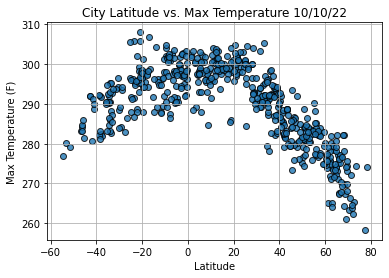

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

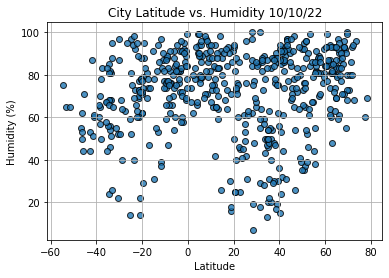

In [24]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

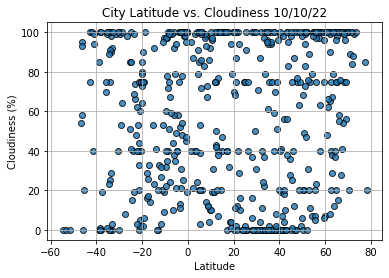

In [25]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

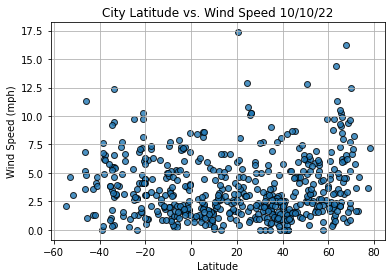

In [26]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()